## 1. Importing important libraries and reading the data set

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Code to display all rows and columns in the output 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
# Read the data from the file to df dataframe
df = pd.read_csv('Leads.csv')

In [4]:
# Check the header of the file
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2. EDA of the dataframe

In [5]:
# Check the shape of the file
df.shape

(9240, 37)

In [6]:
# Let us describe all the columns which have integer values.
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Check the information of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Total number of rows are 9240. Looking at the information of the dataset, there are many missing values in many columns. Let's check the percentage of missing values in each column and then deal with it

In [8]:
#Percentage of null values in each column w.r.t to total number of rows.
round(100*(df.isnull().sum()/df.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Let's drop all the columns in which there are more than 35% of null values are present
col_to_drop = ['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index',
               'Lead Quality','Tags']
df.drop(col_to_drop, axis = 1, inplace = True)

In [10]:
# Lets check the shape of the dataframe again
df.shape

(9240, 31)

In [11]:
# Lets look at the head of the dataframe
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [12]:
# Let us check for any duplicacy in 'Prospect ID' column
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [13]:
# Let us also check for any duplicacy in 'Lead Number' Column
sum(df.duplicated(subset = 'Lead Number')) == 0

True

In [14]:
# 'Prospect ID' and 'Lead Number' columns can be dropped as there are no duplicates and they are more like index numbers.
# 'Country' column also looks insignificant after going through the data dictionary, hence it can also be dropped
cols_to_drop = ['Prospect ID','Lead Number','Country']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [15]:
df.shape

(9240, 28)

#### As can be seen from the dataframe, there are few columns with values called 'Select' which means that the customer had not selected the option for that particular column. These values can be considered as missing values and hence let's convert 'Select' values to np.Nan

In [16]:
#Replacing 'Select' values with Nan
df = df.replace("Select", np.nan)

In [17]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,Mumbai,No,No,Modified


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

### Numerical Variable Analysis

In [20]:
# Let's now check all the numerical variables
numerical_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

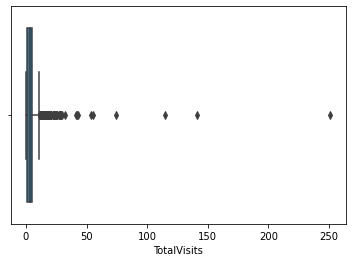

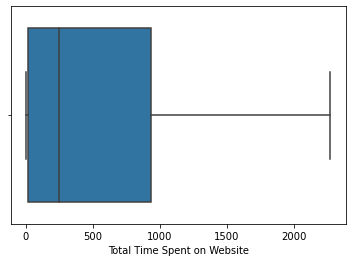

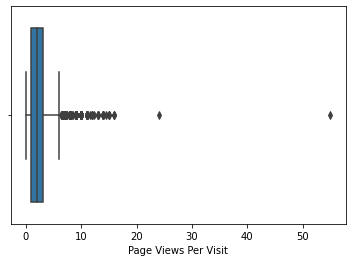

In [21]:
for i in numerical_cols:
    sns.boxplot(df[i])
    plt.show()


#### All the numerical columns looks good w.r.t to any outliers present in it. Moreover, Null values present in these columns are also few. Hence, no need to change anything in these numerical columns as of now

In [22]:
# Let us again check for all null values present in each column to drop columns if any.
round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

In [23]:
# Lets delete the columns which have more than 40% missing values
df.drop(['How did you hear about X Education','Lead Profile'],axis = 1, inplace = True)

In [24]:
df.shape

(9240, 26)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

### Categorical Variable Analysis

In [26]:
# Let us now select all the categorical columns and store in separately
categorical = df.select_dtypes('object')
categorical_cols = categorical.columns 

In [27]:
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

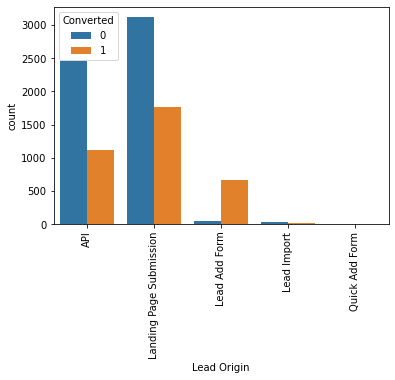

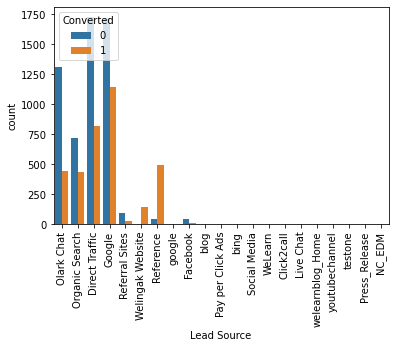

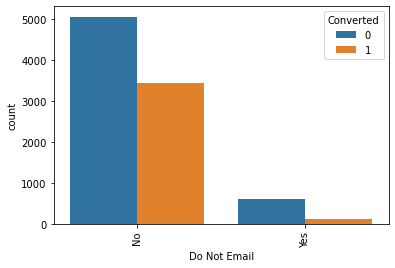

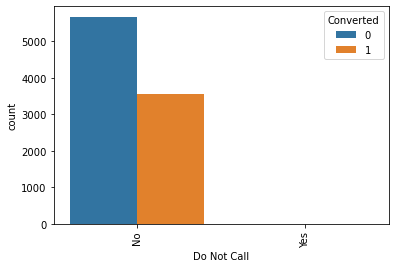

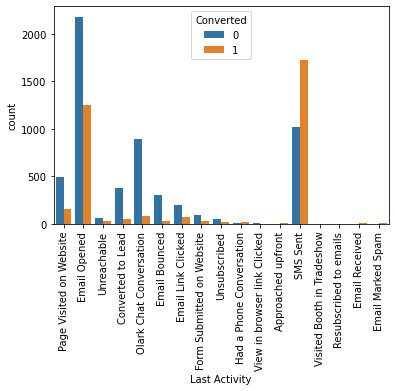

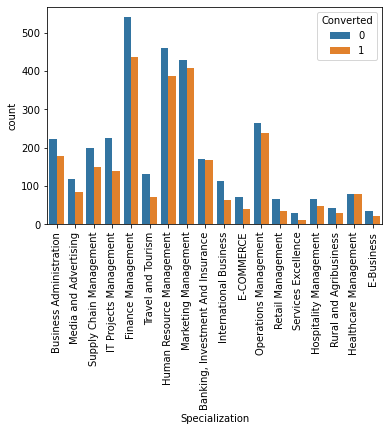

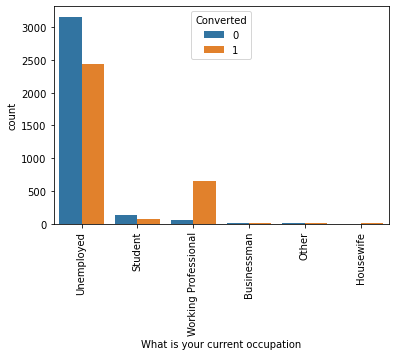

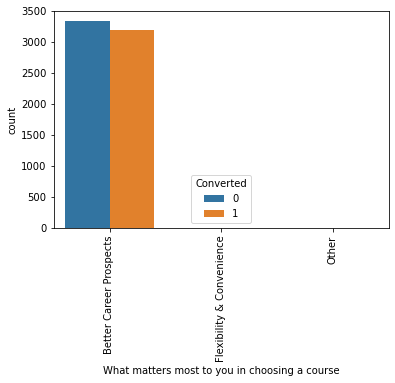

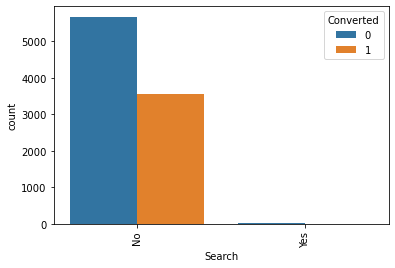

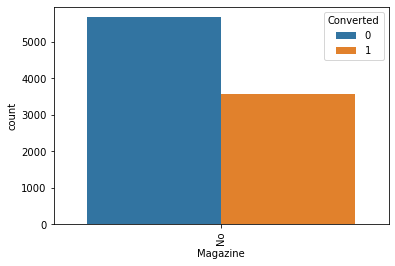

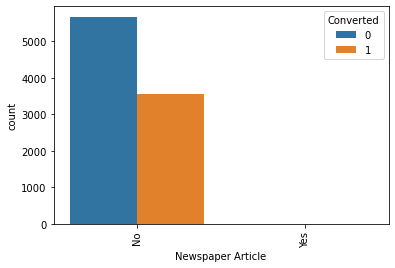

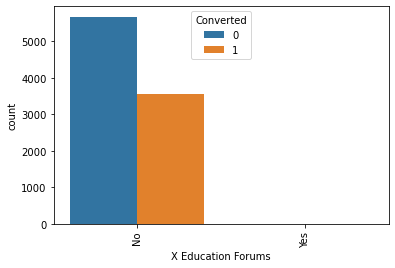

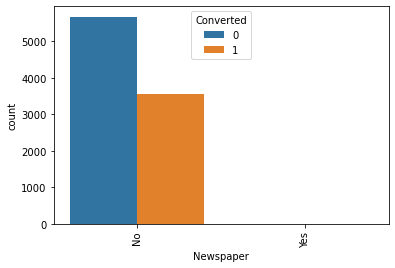

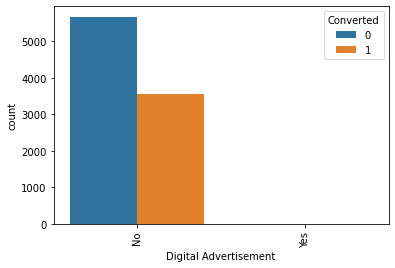

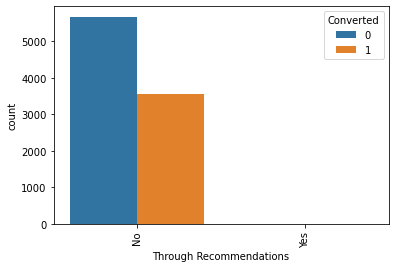

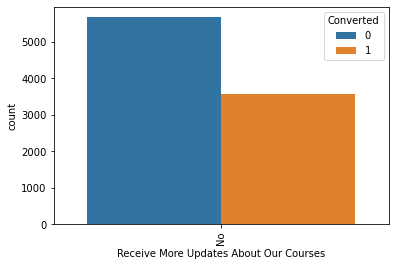

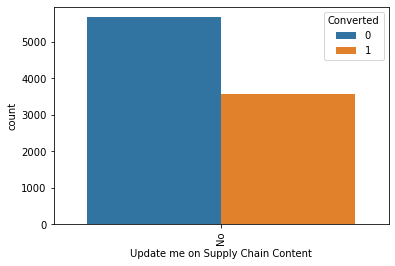

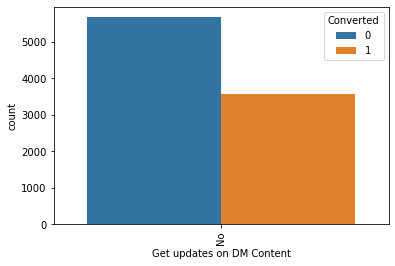

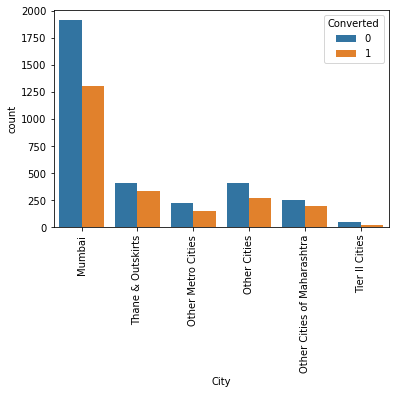

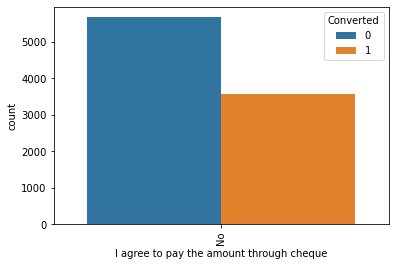

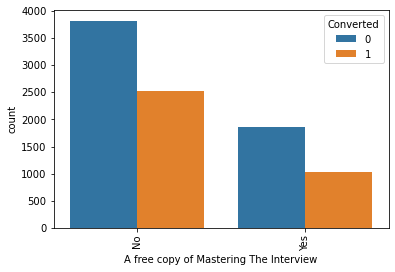

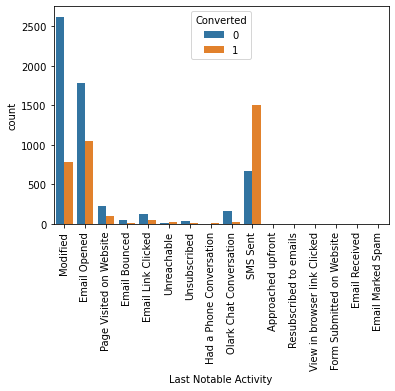

In [28]:
# Let us now check for any skewness in all the categocial columns
for i in categorical_cols:
    sns.countplot(df[i],hue = df.Converted)
    plt.xticks(rotation = 90)
    plt.show()

In [29]:
# After observing the countplots, it is clear that some columns are heavily skewed, hence can be dropped
cols_to_drop = ['Do Not Call', 'Search','Magazine','Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque']
df.drop(cols_to_drop,axis = 1, inplace = True)

In [30]:
df.shape

(9240, 14)

In [31]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
City                                             3669
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [32]:
# Let us now impute the  null values present in columns where the count is high
df.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [33]:
# Leads may not have mentioned specialization. So we will replace NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

In [34]:
df.Specialization.value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [35]:
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [36]:
# Let us impute all NaN values with 'Unemployed'
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [37]:
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
# Let's impute null values in this column with the mode of the column
df['What matters most to you in choosing a course'].replace(np.nan,df['What matters most to you in choosing a course'].mode()[0], inplace = True)

In [40]:
df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [41]:
# However, this column is highly skewed, hence can be dropped from the dataframe for better analysis
df.drop(['What matters most to you in choosing a course'],axis = 1, inplace = True)

In [42]:
df.City.value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [43]:
# Let us impute null values in this column as 'Not Specified' as lead can be of any city
df.City.replace(np.nan,'Not Specified',inplace = True)

In [44]:
df.City.value_counts(dropna =False)

Not Specified                  3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [45]:
df.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Specialization                              0
What is your current occupation             0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [46]:
# Null values have been significantly taken care off. Let us now delete the rows of the columns in which there are null values,
# since there are very less number of null values present in these columns
df = df[~pd.isnull(df['Lead Source'])]
df = df[~pd.isnull(df['TotalVisits'])]
df = df[~pd.isnull(df['Page Views Per Visit'])]
df = df[~pd.isnull(df['Last Activity'])]

In [47]:
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Dataframe is now ready for further analysis and Modeling

### 3. Data Modelling

In [48]:
# Let us take a look at the head of the dataframe
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Not Specified,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Mumbai,No,Modified


#### Let us now convert binary variables to 0/1

In [49]:
df['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [50]:
df['Do Not Email'] = df['Do Not Email'].map({'Yes' : 1 , 'No' : 0})

In [51]:
df['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [52]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'Yes' : 1 , 'No' : 0})

In [53]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Not Specified,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Not Specified,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Mumbai,0,Modified


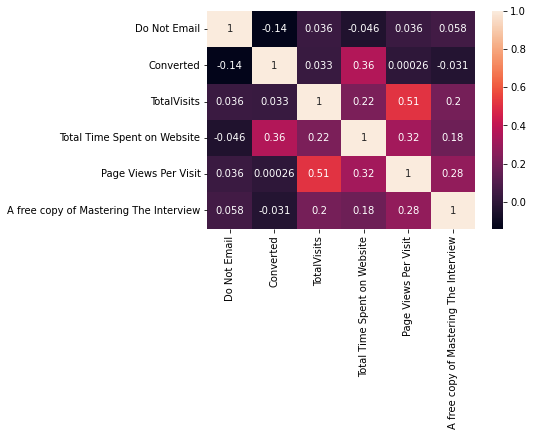

In [54]:
# Let us have a look at the correaltion between all numeric columns
sns.heatmap(data = df.corr(), annot = True)
plt.show()

### 3.1 Encoding

In [55]:
# Encoding all other Categorical variable i.e. creating dummy variable for the categorical variables.
dummy_encoding = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_encoding.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
# Concatenating the dummy_encoding dataframe to the df dataframe
df = pd.concat([df, dummy_encoding], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Not Specified,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Not Specified,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [57]:
# Let us now drop all the columns for which dummy variables have been created
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [58]:
# Chechking shape and info of the newly created dataframe
print(df.shape)
print(df.info())

(9074, 89)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 89 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   A free copy of Mastering The Interview                9074 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 8   Lead Origin_Lead Import                        

### 3.2 Train-Test Split

In [59]:
# Importing important libraries
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [60]:
# Putting feature variables to X
X = df.drop(['Converted'], axis=1)

# Putting target variable to y
y = df['Converted']

In [61]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 3.3 Scaling the features

In [62]:
# Let us now scale all the numerical variables present in the dataframe
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.284595,-0.160255,-0.179666,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.284595,-0.540048,-0.179666,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.284595,1.643304,-0.179666,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.295588,2.017593,0.058552,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 3.4 Feature Selection using RFE

In [63]:
# Let's now select columns using RFE for our model building
logreg = LogisticRegression()


rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 46),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 47),
 ('A free copy of Mastering The Interview', False, 40),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Live Chat', False, 33),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 11),
 ('Lead Source_Social Media', False, 21),
 ('Lead Source_WeLearn', False, 69),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 57),
 ('Lead Source_blog', False, 31),
 ('Lead Source_google', False, 15),


In [65]:
# Viewing and storing columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### 4. Model building

#### Model1

In [66]:
X_train_sm = sm.add_constant(X_train[col])
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.5
Date:                Mon, 02 Jan 2023   Deviance:                       5161.1
Time:                        15:40:19   Pearson chi2:                 6.42e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7719      0.253      6.994      0.000       1.275       2.269
Do Not Email                                            -1.6037      0.201     -7.964      0.000      -1.998      -1.209
Total Time Spent on Website                              1.0995      0.041     27.064      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1392      0.128     -8.895      0.000      -1.390      -0.888
Lead Origin_Lead Add Form                                1.4354      0.894      1.605      0.108      -0.317       3.188
Lead Source_Olark Chat                                   1.0739      0.123      8.727      0.000       0.833       1.315
Lead Source_Reference                                    1.8961      0.918      2.065      0.039       0.097       3.696
Lead Source_Welingak Website                             4.5024      1.152      3.910      0.000       2.245       6.759
Last Activity_Converted to Lead                         -1.0515      0.229     -4.600      0.000      -1.500      -0.604
Last Activity_Email Bounced                             -1.2326      0.434     -2.843      0.004      -2.082      -0.383
Last Activity_Had a Phone Conversation                   1.8298      0.794      2.305      0.021       0.274       3.386
Last Activity_Olark Chat Conversation                   -1.3459      0.196     -6.874      0.000      -1.730      -0.962
Specialization_Not Specified                            -1.1236      0.126     -8.948      0.000      -1.370      -0.878
What is your current occupation_Housewife               22.2837   1.52e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Unemployed              -0.4804      0.216     -2.226      0.026      -0.903      -0.057
What is your current occupation_Working Professional     2.1570      0.286      7.539      0.000       1.596       2.718
Last Notable Activity_Email Link Clicked                -1.8973      0.257     -7.387      0.000      -2.401      -1.394
Last Notable Activity_Email Opened                      -1.4533      0.089    -16.330      0.000      -1.628      -1.279
Last Notable Activity_Modified                          -1.7580      0.101    -17.404      0.000      -1.956      -1.560
Last Notable Activity_Olark Chat Conversation           -1.4927      0.379     -3.942      0.000      -2.235      -0.751
Last Notable Activity_Page Visited on Website           -1.7265      0.203     -8.495      0.000      -2.125      -1.328
========================================================================================================================
"""

In [67]:
# Since Pvalue of 'What is your current occupation_Housewife' is very high i.e. 0.999, we can drop this column.
col = col.drop('What is your current occupation_Housewife')

#### Model 2

In [68]:
X_train_sm = sm.add_constant(X_train[col])
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.7
Date:                Mon, 02 Jan 2023   Deviance:                       5167.4
Time:                        15:40:34   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8532      0.249      7.430      0.000       1.364       2.342
Do Not Email                                            -1.6054      0.201     -7.973      0.000      -2.000      -1.211
Total Time Spent on Website                              1.0987      0.041     27.070      0.000       1.019       1.178
Lead Origin_Landing Page Submission                     -1.1385      0.128     -8.896      0.000      -1.389      -0.888
Lead Origin_Lead Add Form                                1.4356      0.894      1.606      0.108      -0.316       3.188
Lead Source_Olark Chat                                   1.0714      0.123      8.709      0.000       0.830       1.313
Lead Source_Reference                                    1.9043      0.918      2.074      0.038       0.105       3.703
Lead Source_Welingak Website                             4.5033      1.151      3.911      0.000       2.246       6.760
Last Activity_Converted to Lead                         -1.0513      0.229     -4.601      0.000      -1.499      -0.603
Last Activity_Email Bounced                             -1.2317      0.433     -2.842      0.004      -2.081      -0.382
Last Activity_Had a Phone Conversation                   1.8308      0.794      2.306      0.021       0.275       3.387
Last Activity_Olark Chat Conversation                   -1.3458      0.196     -6.872      0.000      -1.730      -0.962
Specialization_Not Specified                            -1.1256      0.125     -8.971      0.000      -1.372      -0.880
What is your current occupation_Unemployed              -0.5620      0.211     -2.664      0.008      -0.975      -0.148
What is your current occupation_Working Professional     2.0744      0.282      7.345      0.000       1.521       2.628
Last Notable Activity_Email Link Clicked                -1.8929      0.256     -7.389      0.000      -2.395      -1.391
Last Notable Activity_Email Opened                      -1.4499      0.089    -16.298      0.000      -1.624      -1.276
Last Notable Activity_Modified                          -1.7585      0.101    -17.410      0.000      -1.957      -1.561
Last Notable Activity_Olark Chat Conversation           -1.4945      0.379     -3.946      0.000      -2.237      -0.752
Last Notable Activity_Page Visited on Website           -1.7281      0.203     -8.504      0.000      -2.126      -1.330
========================================================================================================================
"""

In [69]:
# Since Pvalue of 'Lead Origin_Lead Add Form' is high, we can drop this column.
col = col.drop('Lead Origin_Lead Add Form')


#### Model 3

In [70]:
X_train_sm = sm.add_constant(X_train[col])
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.1
Date:                Mon, 02 Jan 2023   Deviance:                       5170.2
Time:                        15:40:51   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8703      0.249      7.503      0.000       1.382       2.359
Do Not Email                                            -1.6080      0.201     -7.986      0.000      -2.003      -1.213
Total Time Spent on Website                              1.0967      0.041     27.059      0.000       1.017       1.176
Lead Origin_Landing Page Submission                     -1.1561      0.128     -9.059      0.000      -1.406      -0.906
Lead Source_Olark Chat                                   1.0646      0.123      8.670      0.000       0.824       1.305
Lead Source_Reference                                    3.3261      0.243     13.702      0.000       2.850       3.802
Lead Source_Welingak Website                             5.9304      0.733      8.094      0.000       4.494       7.367
Last Activity_Converted to Lead                         -1.0533      0.228     -4.611      0.000      -1.501      -0.606
Last Activity_Email Bounced                             -1.2315      0.434     -2.841      0.005      -2.081      -0.382
Last Activity_Had a Phone Conversation                   1.8260      0.794      2.300      0.021       0.270       3.382
Last Activity_Olark Chat Conversation                   -1.3502      0.196     -6.895      0.000      -1.734      -0.966
Specialization_Not Specified                            -1.1374      0.125     -9.075      0.000      -1.383      -0.892
What is your current occupation_Unemployed              -0.5595      0.211     -2.652      0.008      -0.973      -0.146
What is your current occupation_Working Professional     2.0739      0.282      7.341      0.000       1.520       2.628
Last Notable Activity_Email Link Clicked                -1.8960      0.256     -7.403      0.000      -2.398      -1.394
Last Notable Activity_Email Opened                      -1.4513      0.089    -16.315      0.000      -1.626      -1.277
Last Notable Activity_Modified                          -1.7593      0.101    -17.420      0.000      -1.957      -1.561
Last Notable Activity_Olark Chat Conversation           -1.4931      0.379     -3.942      0.000      -2.235      -0.751
Last Notable Activity_Page Visited on Website           -1.7220      0.203     -8.503      0.000      -2.119      -1.325
========================================================================================================================
"""

In [71]:
# Since Pvalue of 'Last Activity_Had a Phone Conversation' is high, we can drop this column.
col = col.drop('Last Activity_Had a Phone Conversation')


#### Model 4

In [72]:
X_train_sm = sm.add_constant(X_train[col])
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.4
Date:                Mon, 02 Jan 2023   Deviance:                       5176.7
Time:                        15:40:55   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8841      0.249      7.562      0.000       1.396       2.372
Do Not Email                                            -1.6137      0.201     -8.008      0.000      -2.009      -1.219
Total Time Spent on Website                              1.0955      0.040     27.063      0.000       1.016       1.175
Lead Origin_Landing Page Submission                     -1.1610      0.127     -9.112      0.000      -1.411      -0.911
Lead Source_Olark Chat                                   1.0554      0.123      8.605      0.000       0.815       1.296
Lead Source_Reference                                    3.3154      0.243     13.662      0.000       2.840       3.791
Lead Source_Welingak Website                             5.9210      0.733      8.081      0.000       4.485       7.357
Last Activity_Converted to Lead                         -1.0628      0.228     -4.655      0.000      -1.510      -0.615
Last Activity_Email Bounced                             -1.2353      0.434     -2.849      0.004      -2.085      -0.386
Last Activity_Olark Chat Conversation                   -1.3572      0.196     -6.932      0.000      -1.741      -0.973
Specialization_Not Specified                            -1.1394      0.125     -9.101      0.000      -1.385      -0.894
What is your current occupation_Unemployed              -0.5570      0.211     -2.639      0.008      -0.971      -0.143
What is your current occupation_Working Professional     2.0730      0.282      7.338      0.000       1.519       2.627
Last Notable Activity_Email Link Clicked                -1.9055      0.256     -7.441      0.000      -2.407      -1.404
Last Notable Activity_Email Opened                      -1.4617      0.089    -16.451      0.000      -1.636      -1.288
Last Notable Activity_Modified                          -1.7611      0.101    -17.460      0.000      -1.959      -1.563
Last Notable Activity_Olark Chat Conversation           -1.4939      0.379     -3.945      0.000      -2.236      -0.752
Last Notable Activity_Page Visited on Website           -1.7326      0.202     -8.559      0.000      -2.129      -1.336
========================================================================================================================
"""

In [73]:
### All the p-values looks good now.Let us now check VIF for any correlation between various columns

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,10.49
2,Lead Origin_Landing Page Submission,5.73
9,Specialization_Not Specified,4.02
14,Last Notable Activity_Modified,2.99
3,Lead Source_Olark Chat,2.25
13,Last Notable Activity_Email Opened,2.12
8,Last Activity_Olark Chat Conversation,2.03
0,Do Not Email,1.86
7,Last Activity_Email Bounced,1.76
11,What is your current occupation_Working Profes...,1.65


In [74]:
# Since VIF of 'What is your current occupation_Unemployed' is high, we can drop this column.
col = col.drop('What is your current occupation_Unemployed')


#### Model 5

In [75]:
X_train_sm = sm.add_constant(X_train[col])
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.8
Date:                Mon, 02 Jan 2023   Deviance:                       5183.5
Time:                        15:41:02   Pearson chi2:                 6.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3380      0.137      9.787      0.000       1.070       1.606
Do Not Email                                            -1.6086      0.202     -7.979      0.000      -2.004      -1.214
Total Time Spent on Website                              1.0959      0.040     27.080      0.000       1.017       1.175
Lead Origin_Landing Page Submission                     -1.1641      0.128     -9.130      0.000      -1.414      -0.914
Lead Source_Olark Chat                                   1.0618      0.123      8.656      0.000       0.821       1.302
Lead Source_Reference                                    3.3261      0.242     13.725      0.000       2.851       3.801
Lead Source_Welingak Website                             5.9126      0.733      8.070      0.000       4.477       7.349
Last Activity_Converted to Lead                         -1.0641      0.229     -4.656      0.000      -1.512      -0.616
Last Activity_Email Bounced                             -1.2351      0.434     -2.847      0.004      -2.085      -0.385
Last Activity_Olark Chat Conversation                   -1.3474      0.196     -6.889      0.000      -1.731      -0.964
Specialization_Not Specified                            -1.1499      0.125     -9.173      0.000      -1.396      -0.904
What is your current occupation_Working Professional     2.6124      0.196     13.361      0.000       2.229       2.996
Last Notable Activity_Email Link Clicked                -1.8946      0.255     -7.418      0.000      -2.395      -1.394
Last Notable Activity_Email Opened                      -1.4457      0.088    -16.336      0.000      -1.619      -1.272
Last Notable Activity_Modified                          -1.7558      0.101    -17.420      0.000      -1.953      -1.558
Last Notable Activity_Olark Chat Conversation           -1.4783      0.378     -3.911      0.000      -2.219      -0.737
Last Notable Activity_Page Visited on Website           -1.7218      0.202     -8.506      0.000      -2.118      -1.325
========================================================================================================================
"""

In [76]:
# p-values of all the columns looks good. Let us again check the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,2.71
9,Specialization_Not Specified,2.46
2,Lead Origin_Landing Page Submission,2.36
3,Lead Source_Olark Chat,2.08
8,Last Activity_Olark Chat Conversation,2.03
12,Last Notable Activity_Email Opened,1.87
0,Do Not Email,1.85
7,Last Activity_Email Bounced,1.76
14,Last Notable Activity_Olark Chat Conversation,1.37
1,Total Time Spent on Website,1.27


#### All the p-values and VIF values looks godd. Hence, it is our final model

### 5. Model Evaluation

In [77]:
# Getting the predicted values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.190392
1012    0.141953
9226    0.185466
4750    0.878116
7987    0.652278
1281    0.764678
2880    0.096421
4971    0.968456
7536    0.849582
1248    0.611624
dtype: float64

In [78]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.1903921 , 0.14195316, 0.18546634, 0.87811559, 0.65227791,
       0.76467772, 0.09642103, 0.96845619, 0.84958245, 0.61162381])

In [79]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
0,0,0.190392,3009
1,0,0.141953,1012
2,0,0.185466,9226
3,1,0.878116,4750
4,1,0.652278,7987


#### Let us choose 0.5 as the threshold probability to find the predicted labels i.e. creating a now column with values as 1 if probability is > 0.5

In [80]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
0,0,0.190392,3009,0
1,0,0.141953,1012,0
2,0,0.185466,9226,0
3,1,0.878116,4750,1
4,1,0.652278,7987,1


### Confusion Matrix

In [81]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3462  443]
 [ 717 1729]]


In [82]:
# Let's now check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.817351598173516


In [83]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Calculate the sensitivity

TP/(TP+FN)

0.7068683565004088

In [85]:
# Calculate the specificity

TN/(TN+FP)

0.8865556978233035

#### We found out that our specificity was good (~88%) but sensitivity was only 70%. So let us have a closer look at this data.
#### Above two measurements are mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point should be optimised in order to get a decent value of sensitivity. For this purpose, we will use the ROC curve.

### Plotting the ROC Curve

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                          drop_intermediate = False )

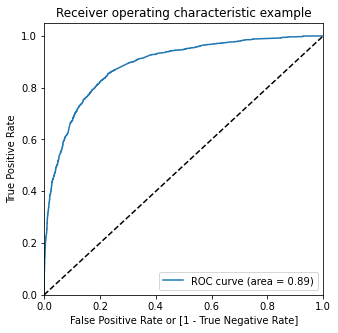

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### It is to note that the area under the curve is 0.89 which is a decent value. Hence it can be stated that our model is good.

In [89]:
# Let us now find the optimal cut-off
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.190392,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.141953,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.185466,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.878116,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.652278,7987,1,1,1,1,1,1,1,1,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.599276  0.972608  0.365429
0.2   0.2  0.759408  0.908422  0.666069
0.3   0.3  0.802708  0.849959  0.773111
0.4   0.4  0.814202  0.782502  0.834059
0.5   0.5  0.817352  0.706868  0.886556
0.6   0.6  0.802236  0.603843  0.926504
0.7   0.7  0.783814  0.519624  0.949296
0.8   0.8  0.765864  0.437858  0.971319
0.9   0.9  0.723980  0.302944  0.987708


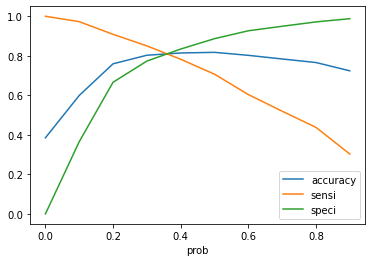

In [91]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curve generated, 0.35 looks like the optimum point for cut-off probability

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.190392,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.141953,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.185466,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.878116,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.652278,7987,1,1,1,1,1,1,1,1,0,0,0,1


### Assigning Lead Score to the Training data

In [93]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.190392,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.141953,1012,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.185466,9226,0,1,1,0,0,0,0,0,0,0,0,0,19
3,1,0.878116,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.652278,7987,1,1,1,1,1,1,1,1,0,0,0,1,65


### Model Revalutaion

In [94]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8085340891198236


In [95]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3137,  768],
       [ 448, 1998]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [97]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.8168438266557645


In [98]:
# Let us calculate specificity
print(TN / float(TN+FP))

0.8033290653008963


In [99]:
# Precision
TP / (TP + FP)

#print(confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))

0.7223427331887202

In [100]:
# Recall
TP / (TP + FN)

0.8168438266557645

### Precision - Recall Tradeoff

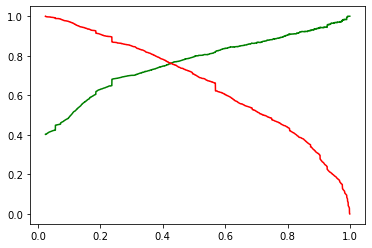

In [101]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 6. Prediction on the Test set

In [102]:
# Scaling the test set
X_test[['TotalVisits',
        'Total Time Spent on Website',
        'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                            'Total Time Spent on Website',
                                                            'Page Views Per Visit']])

In [103]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [104]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.128329
1490    0.967979
7936    0.110790
4216    0.873745
3830    0.128315
1800    0.627045
6507    0.368052
4821    0.294332
4223    0.926925
4714    0.185466
dtype: float64

In [105]:
# Converting y_test_pred to a dataframe which is an array
y_pred_new = pd.DataFrame(y_test_pred)


In [106]:
# Let's see the head
y_pred_new.head()

,0
3271,0.128329
1490,0.967979
7936,0.110790
4216,0.873745
3830,0.128315


In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Index to Prospect ID as a new column
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_new.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_new
y_pred_final = pd.concat([y_test_df, y_pred_new],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.128329
1,1,1490,0.967979
2,0,7936,0.110790
3,1,4216,0.873745
4,0,3830,0.128315


In [108]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.128329
1,1490,1,0.967979
2,7936,0,0.110790
3,4216,1,0.873745
4,3830,0,0.128315


In [109]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.128329,0
1,1490,1,0.967979,1
2,7936,0,0.110790,0
3,4216,1,0.873745,1
4,3830,0,0.128315,0


In [110]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))


0.8046272493573264


In [111]:
# Making the confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1392,  342],
       [ 190,  799]], dtype=int64)

In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.80788675429727


In [114]:
# Let us calculate specificity
print(TN / float(TN+FP))


0.8027681660899654


### Assigning lead score to the test set

In [115]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.128329,0,13
1,1490,1,0.967979,1,97
2,7936,0,0.110790,0,11
3,4216,1,0.873745,1,87
4,3830,0,0.128315,0,13


In [116]:
### Let us look at important columns/features of the model
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.912559
Lead Source_Reference                                   3.326133
What is your current occupation_Working Professional    2.612434
const                                                   1.337992
Total Time Spent on Website                             1.095857
Lead Source_Olark Chat                                  1.061814
Last Activity_Converted to Lead                        -1.064091
Specialization_Not Specified                           -1.149910
Lead Origin_Landing Page Submission                    -1.164113
Last Activity_Email Bounced                            -1.235112
Last Activity_Olark Chat Conversation                  -1.347364
Last Notable Activity_Email Opened                     -1.445727
Last Notable Activity_Olark Chat Conversation          -1.478270
Do Not Email                                           -1.608638
Last Notable Activity_Page Visited on Website          -1.721757
Last Notable Activity_Mod

In [117]:
# Let us now see which are the leads to whom the company can contact. Lead_score > 85 is a good criteria.
hot_leads_to_contact = y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads_to_contact

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.967979,1,97
3,4216,1,0.873745,1,87
8,4223,1,0.926925,1,93
16,1946,1,0.928641,1,93
21,2461,1,0.994100,1,99
...,...,...,...,...,...
2694,1566,1,0.945932,1,95
2699,6461,1,0.964486,1,96
2703,5741,1,0.917206,1,92
2715,6299,1,0.886275,1,89


### Details of the Train data set
1. Accuracy    : 80.8%
2. Sensitivity : 82.5%
3. Specificity : 79.7%

### Details of the Test data set
1. Accuracy    : 80.4%
2. Sensitivity : 80.7%
3. Specificity : 80.2%

### Observations
- The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference".
- The company should make calls to the leads who are the "working professionals".
- The company should make calls to the leads who spent "more time on the websites".
- The company should make calls to the leads coming from the lead sources "Olark Chat".

- The company should not make calls to the leads whose last notable activity was "Email Link Clicked".
- The company should not make calls to the leads whose last notable activity was "Page Visited on Website".
- The company should not make calls to the leads whose lead origin is "Landing Page Submission" 
- The company should not make calls to the leads whose Specialization was "Not Specified"
- The company should not make calls to the leads whose last activity was "Email Bounced".
- The company should not make calls to the leads whose last activity was "Olark Chat Conversation".
- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" 